In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [141]:
submission = pd.read_csv('gender_submission.csv')

In [386]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [143]:
drop = ["Name","Ticket","Cabin","PassengerId"]
train = train.drop(drop, axis=1)

In [144]:
test = test.drop(drop, axis=1)

In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [146]:
train.shape

(891, 8)

In [147]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [184]:
test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
print(train['Age'].median())
print(train['Embarked'].mode())

In [186]:
print(test['Age'].median())
print(test['Fare'].median())

28.0
14.4542


In [151]:
train['Age'].fillna(28.0, inplace=True)
train['Embarked'].fillna('S', inplace=True)

In [152]:
test['Age'].fillna(28.0, inplace=True)
test['Fare'].fillna(14.5, inplace=True)

In [187]:
test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [189]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [167]:
train = pd.get_dummies(train)

In [190]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [191]:
target = train['Survived']
features = train[['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]

In [192]:
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)

In [396]:
def modelfit(alg,
             dtrain,
             predictors,
             useTrainCV=True,
             cv_folds=5,
             early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(features.values, target.values)
        cvresult = xgb.cv(
            xgb_param,
            xgtrain,
            num_boost_round=alg.get_params()['n_estimators'],
            nfold=cv_folds,
            metrics='auc',
            early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(features, target, eval_metric='auc')

    #Predict training set:
    dtrain_predictions = alg.predict(features)
    dtrain_predprob = alg.predict_proba(features)[:, 1]

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(
        target.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(
        target, dtrain_predprob))

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.8889
AUC Score (Train): 0.941552


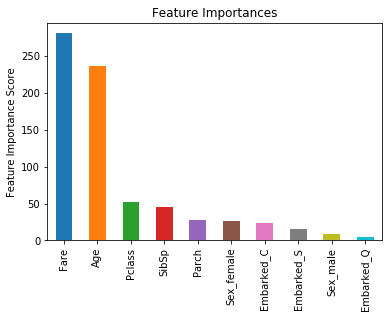

In [397]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


#Choose all predictors except target & IDcols
predictors = features
xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
modelfit(xgb1, train, predictors)

In [401]:
param_test3 = {'gamma': [i / 10.0 for i in range(0, 5)]}
gsearch3 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=140,
        max_depth=4,
        min_child_weight=6,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27),
    param_grid=param_test3,
    scoring='roc_auc',
    n_jobs=4,
    iid=False,
    cv=5)
gsearch3.fit(features, target)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.87370, std: 0.02770, params: {'gamma': 0.0},
  mean: 0.87396, std: 0.02844, params: {'gamma': 0.1},
  mean: 0.87325, std: 0.02715, params: {'gamma': 0.2},
  mean: 0.87467, std: 0.02689, params: {'gamma': 0.3},
  mean: 0.87175, std: 0.02558, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 0.8746668277130631)

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.881
AUC Score (Train): 0.943315


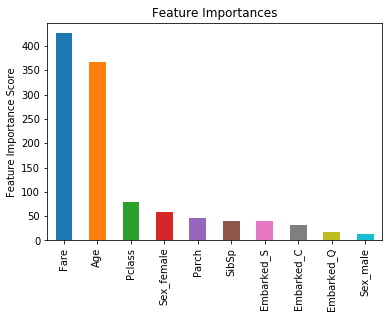

In [402]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)

In [405]:
param_test4 = {
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]
}
gsearch4 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=177,
        max_depth=4,
        min_child_weight=6,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27),
    param_grid=param_test4,
    scoring='roc_auc',
    n_jobs=4,
    iid=False,
    cv=5)
gsearch4.fit(features, target)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.86987, std: 0.02544, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.87120, std: 0.02740, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.87275, std: 0.02831, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.86969, std: 0.02478, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.87053, std: 0.02370, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.87292, std: 0.02682, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.87373, std: 0.02637, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.86998, std: 0.02561, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.87200, std: 0.02133, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.87117, std: 0.02738, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.87571, std: 0.02670, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.87015, std: 0.02691, params: {'colsample_bytree': 0.8, 'subsample'

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.8732
AUC Score (Train): 0.925055


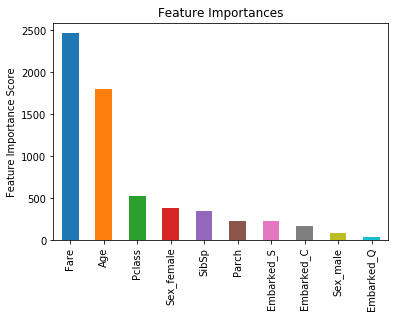

In [406]:
xgb4 = XGBClassifier(
    learning_rate=0.01,
    n_estimators=5000,
    max_depth=4,
    min_child_weight=6,
    gamma=0.3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
modelfit(xgb4, train, predictors)

In [193]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [407]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, gamma=0, max_depth=3, 
                        colsample_bytree=0.8, subsample=1, objective='binary:logistic', seed=27,scale_pos_weight=0.8)
xgb4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=930, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=None, subsample=0.8, verbosity=1)

In [408]:
#xgb.fit(X_train,y_train)

preds = xgb4.predict(X_test)

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [409]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,preds)
accuracy

0.8547486033519553

In [410]:
prediction = xgb4.predict(test)

xgb = pd.DataFrame({'PassengerId':submission["PassengerId"],'Survived':prediction})
xgb.to_csv('prediction_xgb2.csv')

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [371]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 150
params['min_data'] = 50
params['max_depth'] = 7

gbm = lgb.train(params, d_train, 50)

In [375]:
predictions = gbm.predict(X_train)
#prediction = np.argmax(predictions)

In [378]:
for i in range(0,712):
    if predictions[i]>=.5:
        predictions[i]=1
    else:
        predictions[i]=0

In [382]:
predictions = pd.DataFrame(predictions)

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, y_test)
accuracy

In [294]:
#Prediction
pred=gbm.predict(X_test)

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, y_test)

In [411]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(C=10, kernel='rbf', degree=5, gamma=0.3)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6927374301675978


In [412]:
prediction = clf.predict(test)

svm = pd.DataFrame({'PassengerId':submission["PassengerId"],'Survived':prediction})
svm.to_csv('prediction_svm.csv')

In [317]:
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1]
    gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [318]:
svc_param_selection(X_train, y_train, 10)

{'C': 1, 'gamma': 0.1}